DATA 110 FINAL PROJECT, TEAM 6, ANTHONY MELE, ARJUN AMAHESH, RYAN SCHANG, AND SIMEON SUKINDER.

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("future.no_silent_downcasting", True)



We investigated the question:  Which physical traits are most useful for identifying and differentiating between various Antarctic penguin species?

Define the problem: As a group, we wanted to answer the question: How easy is it to distinguish different Antarctic penguin species based on certain phenotypes?  We aim to test the hypothesis that the four observed traits (culmen length, culmen depth, flipper length, and body mass) contain enough signal to reliably distinguish Adélie, Chinstrap, and Gentoo penguins. This study could be beneficial for penguin conservation efforts. If different species can easily be identified from a distance, conservationists and researchers could track population trends without disturbing the penguins’ environment up close. Furthermore, tracking penguin population data can give valuable insights into environmental changes, such as fluctuations in fish populations which penguins rely on for food and climate change. If a certain penguin species is declining significantly, actions could be taken by conservation groups to protect these species. However, none of this is possible without the ability to accurately and frequently identify these populations.

In [12]:
penguins = pd.read_csv('penguin.csv')

Data collection: Source(s) of the data, including if they come from multiple tables.
Our analysis uses the Palmer Penguins dataset compiled by Dr. Kristen Gorman for the Palmer Station Long-Term Ecological Research (LTER) program (2007 – 2009). The public version ships as three original tables, one per species, that have been merged into a single “penguins” table packaged in both the R palmer penguins library and the companion Python package. This dataset was originally used for an ecological study analyzing sexual dimorphism and environmental variability in Antarctic penguin species. Specifically, The researchers were aiming to explore differences between male and female penguins, and how their environmental factors could influence these species. They were analyzing the physical traits of penguins (culmen length, culmen depth, flipper length, and body mass) in order to help distinguish the sex and species of a penguin. Due to the nature of how this dataset was collected, we will not be collecting our data and instead be gratefully using the data given by Dr.Kristen Gorman and the Palmer Station. That being said, we can see that the population in this dataset is made up of three species: Adélies Penguins, Chinstrap Penguins, and Gentoo Penguins. 

Clearly state the number of samples and number of features.
Our data includes 17 features and 344 samples, but we only use 4 features: culmen length, culmen depth, flipper length, and body mass.
Mention the features (or categories of features if there are many of them).
'Individual ID', 'Clutch Completion','Date Egg','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Comments',  studyName, Sample Number, Species, Region, Island, Stage, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm).
Mention potential sampling bias or limitations in the data collection process.
There may be a geographic sampling bias because all of the sampling for this dataset was conducted on a small section of land. The data may not be entirely representative of Antarctica. The data also does not account for seasonal or long term changes in penguin population. The findings of this study may become obsolete if penguin populations change drastically over time.


In [23]:
penguins = penguins.filter(["Species",'Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)'])
penguins = penguins.dropna()
penguins


,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0
5,Adelie Penguin (Pygoscelis adeliae),39.3,20.6,190.0
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,13.7,214.0
340,Gentoo penguin (Pygoscelis papua),46.8,14.3,215.0
341,Gentoo penguin (Pygoscelis papua),50.4,15.7,222.0
342,Gentoo penguin (Pygoscelis papua),45.2,14.8,212.0


In [24]:
train = penguins.sample(frac=0.8)
test = penguins.drop(index=train.index)


In [25]:
penguin_culmenlength_mean = penguins.groupby("Species")["Culmen Length (mm)"].mean()
penguin_culmendepth_mean = penguins.groupby("Species")["Culmen Depth (mm)"].mean()
penguin_flipperlength_mean = penguins.groupby("Species")["Flipper Length (mm)"].mean()
print(penguin_culmenlength_mean)
print(penguin_culmendepth_mean) 
print(penguin_flipperlength_mean )

Species
Adelie Penguin (Pygoscelis adeliae)          38.791391
Chinstrap penguin (Pygoscelis antarctica)    48.833824
Gentoo penguin (Pygoscelis papua)            47.504878
Name: Culmen Length (mm), dtype: float64
Species
Adelie Penguin (Pygoscelis adeliae)          18.346358
Chinstrap penguin (Pygoscelis antarctica)    18.420588
Gentoo penguin (Pygoscelis papua)            14.982114
Name: Culmen Depth (mm), dtype: float64
Species
Adelie Penguin (Pygoscelis adeliae)          189.953642
Chinstrap penguin (Pygoscelis antarctica)    195.823529
Gentoo penguin (Pygoscelis papua)            217.186992
Name: Flipper Length (mm), dtype: float64


Data exploration: Some of the summary statistics that we have calculated are culmen depth, culmen, and flipper length means per species. These measurements vary between species, with Gentoo penguin on average having the longest culmen and flipper length. Another summary statistic that we have calculated is the average of flipper and culmen length and compared them. The average flipper length for all species of penguins is 200.92 mm with a minimum length of 172mm and a max of 231mm. The average culmen length of 43.92mm and a minimum length of 32.1mm and maximum length of 59.6mm. One thing that we observed when calculating these statistics was that on average, the flipper length for penguins is around 4.5 x the culmen length of a penguin. This means that if a penguin has a long culmen, there is a high chance that the penguin also has long flippers.


In [46]:
train['Species'] = train.Species.replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
test['Species'] = test.Species.replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

y_train = train["Species"] 
X_train = train.drop(columns=["Species"])
print(X_train.shape, y_train.shape)

y_test = test["Species"]
X_test = test.drop(columns=["Species"])
print(X_test.shape, y_test.shape)
print(X_train.columns)

(274, 3) (274,)
(68, 3) (68,)
Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'], dtype='object')


Data preparation: if you dropped any data, describe why and how you did it. We dropped several columns that are unimportant for classifying penguin types. The columns that we kept were culmen depth (mm), culmen length (mm), flipper length (mm) and species.
If you normalized any data, describe why and how you did it.
There was no need to normalize any data.
If you converted any categorical data to numeric, describe why and how you did it. We changed the species name to numeric because you cannot train the data with categorical data. We did this by changing 'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2. This helped our train and test data be more accurate when classifying penguins.
Describe any other data preparation steps you may have taken. We took steps to calculate the mean for the species in order to help our decision tree be able to classify the penguins by the mean data.Data exploration

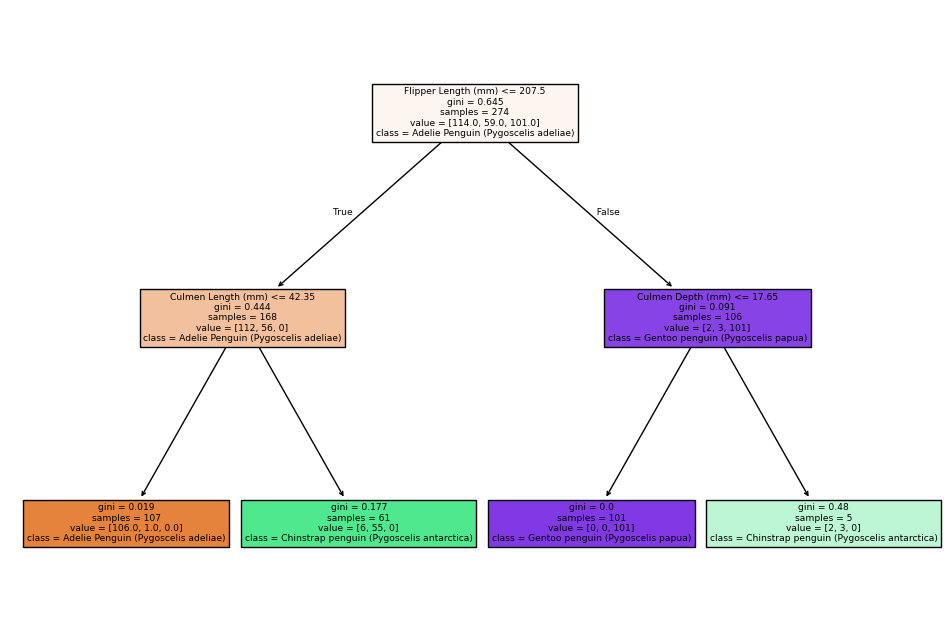

In [51]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

penguin_means = penguins.groupby("Species").mean()
X = train.drop(columns=["Species"])
y = train["Species"]




import matplotlib.pyplot as plt

T = DecisionTreeClassifier(max_depth=2, random_state =42)
T.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(12,8))
plot_tree(T, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()






Model building: Describe the model you chose to use and why. The model that we chose was a decision tree model to help classify penguin species based on their phenotypes. We chose this because we thought it would be the most straightforward way to classify different penguins in the wild.
Describe the features or variables you used and why. Remember that you need to investigate at least 3 variables and their relationships. Clearly state which variables (out of all of them in your dataset) you chose to investigate. The variables that we chose to help classify the penguins were culmen length, culmen depth, and flipper length. The reason that we chose these three variables in specific are that they don't only help distinguish different penguin species, but in the wild you may not have a scale to measure something like body mass, but if you have a ruler or measuring stick you can measure all of these characteristics.


Model deployment: Briefly describe how you could envision this model being used or deployed. We can envision these models being used to help classify penguins in the wild. If you were to find a penguin, you could classify them based on the features that we chose. Even though our decision tree is not super deep, it is enough where it would help with penguin classification.
Briefly describe any issues, risks, and or challenges you see with deploying your model. The main risk with deploying our model relates to the depth of our decision tree. Because we limited the tree to a depth of two, the model is very simple. While this helps prevent overfitting and may result in better generalization to new (test) data, it also means that the model may underfit the training data capturing only very basic patterns.


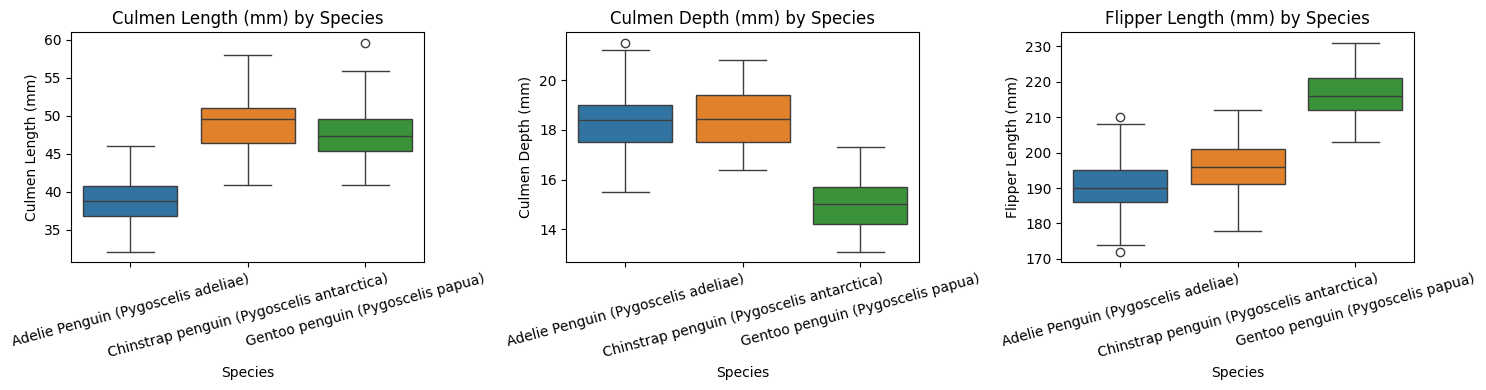

In [27]:
species_order = [
    "Adelie Penguin (Pygoscelis adeliae)",
    "Chinstrap penguin (Pygoscelis antarctica)",
    "Gentoo penguin (Pygoscelis papua)"
]

species_palette = {
    "Adelie Penguin (Pygoscelis adeliae)": "#1f77b4",
    "Chinstrap penguin (Pygoscelis antarctica)": "#ff7f0e",
    "Gentoo penguin (Pygoscelis papua)": "#2ca02c"
}

features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

plt.figure(figsize=(15, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=penguins,
        x='Species',
        y=feature,
        hue='Species',
        order=species_order,
        palette=species_palette
    )
    plt.xticks(rotation=15)
    plt.title(f'{feature} by Species')

plt.tight_layout()
plt.show()

This visualization consists of boxplots that show the distribution of each phenotype for the three penguin species: Adelie, Chinstrap, and Gentoo. These plots show that the different penguin species have distinct general differences in their phenotypes. Adelie penguins tend to have shorter culmens. Gentoo penguins are characterized by shallower culmens and longer flippers. Chinstrap penguins show intermediate traits. This vizualization shows distinct phenotypic differences across penguin species. Although every species displays overlapping, there are specific phenotypes that can more accurately distinguish species.

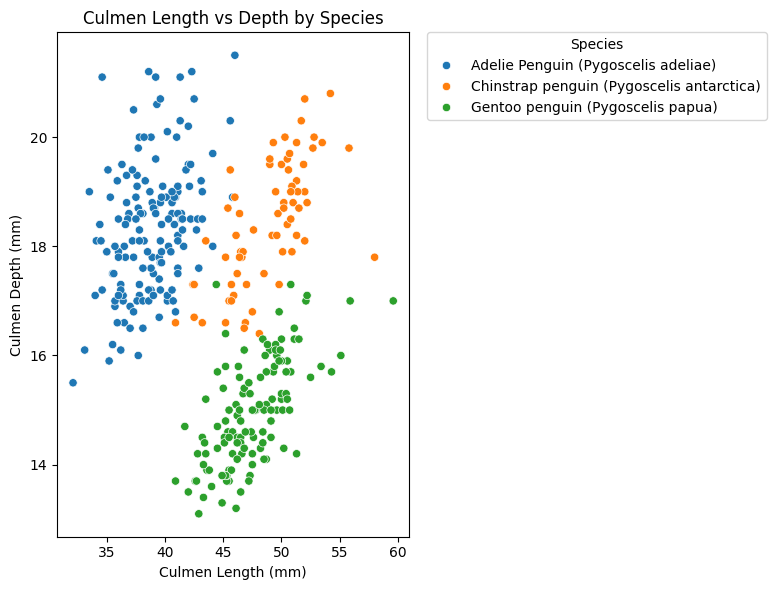

In [28]:
species_palette = {
    "Adelie Penguin (Pygoscelis adeliae)": "#1f77b4",
    "Chinstrap penguin (Pygoscelis antarctica)": "#ff7f0e",
    "Gentoo penguin (Pygoscelis papua)": "#2ca02c"
}

plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=penguins,
    x='Culmen Length (mm)',
    y='Culmen Depth (mm)',
    hue='Species',
    palette=species_palette
)

plt.title('Culmen Length vs Depth by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')

plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

This visualization focuses on a two-dimensional scatter plot of culmen length versus culmen depth. This plot reveals strong visual separation among the species. Adelie penguins cluster around shorter and deeper culmens, Gentoo penguins are found at the longer and shallower end of the spectrum, and Chinstrap penguins occupy the middle range but tend to align more closely with Adelie in culmen depth. This focused comparison shows that it is possible to visually distinguish most individuals by species even with just two traits.

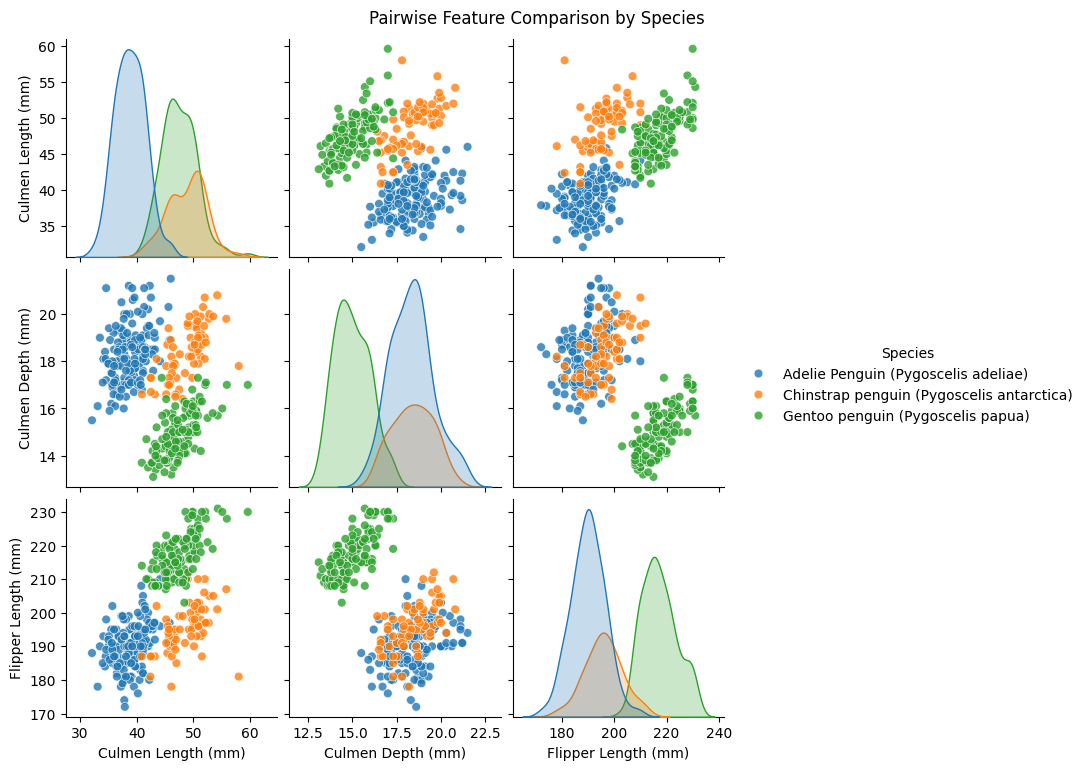

In [30]:
species_palette = {
    "Adelie Penguin (Pygoscelis adeliae)": "#1f77b4",
    "Chinstrap penguin (Pygoscelis antarctica)": "#ff7f0e",
    "Gentoo penguin (Pygoscelis papua)": "#2ca02c"
}

# Features to plot
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']

# Create the pairplot
sns.pairplot(
    penguins,
    vars=features,
    hue='Species',
    palette=species_palette,
    plot_kws={'alpha': 0.8, 's': 40}
)

plt.suptitle("Pairwise Feature Comparison by Species", y=1.02)
plt.show()

This visualization, a pairwise scatter plot, displays how each pair of the three traits varies across species. In these plots, species form relatively distinct clusters—especially in the culmen length versus depth and culmen length versus flipper length comparisons. Gentoo and Adelie penguins, in particular, show very little overlap, while Chinstrap penguins overlap slightly with both but still tend to group together. This visualization suggests that combinations of phenotypic features can be more powerful than individual traits in distinguishing species.

Meeting Attendance:


By Tuesday April 8 - Rough draft of Write-Up and Coding complete.
By Tuesday April 15 - Write-Up and Coding complete.
By Tuesday April 22 - Rough draft of poster presentation complete.
By Tuesday April 29 - Poster presentation complete.
Following presentation - reflection and teamwork completed.
Every member of our group attended each meeting.


SyntaxError: invalid syntax (3691377928.py, line 1)